In [1]:
from sklearn.datasets import load_breast_cancer, load_diabetes
import pandas as pd

# Load the datasets
breast_cancer = load_breast_cancer()
diabetes = load_diabetes()

# Combine the datasets into a pandas dataframe
data = pd.concat([
    pd.DataFrame(breast_cancer.data, columns=breast_cancer.feature_names),
    pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
])

# Add a column for the target variable
data['target'] = [0] * len(breast_cancer.target) + [1] * len(diabetes.target)

# Print the first few rows of the dataframe
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from warnings import filterwarnings
filterwarnings('ignore')

# Separate the features and target variable
X = data.drop('target', axis=1)
y = data['target']

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_scaled)

# Convert the numpy array back to a pandas dataframe
X_preprocessed = pd.DataFrame(X_imputed, columns=X.columns)

# Print the first few rows of the preprocessed dataframe
X_preprocessed.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,...,1.607563e-17,-6.028360e-18,-2.612289e-17,-1.607563e-17,1.607563e-17,-2.411344e-17,0.0,3.215126e-17,-8.037814e-18,2.411344e-17
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,...,1.607563e-17,-6.028360e-18,-2.612289e-17,-1.607563e-17,1.607563e-17,-2.411344e-17,0.0,3.215126e-17,-8.037814e-18,2.411344e-17
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,...,1.607563e-17,-6.028360e-18,-2.612289e-17,-1.607563e-17,1.607563e-17,-2.411344e-17,0.0,3.215126e-17,-8.037814e-18,2.411344e-17
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,...,1.607563e-17,-6.028360e-18,-2.612289e-17,-1.607563e-17,1.607563e-17,-2.411344e-17,0.0,3.215126e-17,-8.037814e-18,2.411344e-17
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,...,1.607563e-17,-6.028360e-18,-2.612289e-17,-1.607563e-17,1.607563e-17,-2.411344e-17,0.0,3.215126e-17,-8.037814e-18,2.411344e-17


In [3]:
from sklearn.preprocessing import OneHotEncoder

# Select the categorical columns
cat_cols = ['sex']

# Apply one-hot encoding to the categorical columns
encoder = OneHotEncoder()
X_encoded = encoder.fit_transform(data[cat_cols])

# Convert the sparse matrix to a pandas dataframe
X_encoded_DATA = pd.DataFrame(X_encoded.toarray(), columns=encoder.get_feature_names_out(cat_cols))

# Reset the index of the original dataframe
data = data.reset_index(drop=True)

# Concatenate the encoded dataframe with the original dataframe
data_encoded = pd.concat([data.drop(cat_cols, axis=1), X_encoded_DATA], axis=1)

# Print the first few rows of the encoded dataframe
data_encoded.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,s1,s2,s3,s4,s5,s6,target,sex_-0.044641636506989144,sex_0.05068011873981862,sex_nan
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0.0,0.0,1.0


In [4]:
# count nan
data = data_encoded
data.isna().sum()

mean radius                  442
mean texture                 442
mean perimeter               442
mean area                    442
mean smoothness              442
mean compactness             442
mean concavity               442
mean concave points          442
mean symmetry                442
mean fractal dimension       442
radius error                 442
texture error                442
perimeter error              442
area error                   442
smoothness error             442
compactness error            442
concavity error              442
concave points error         442
symmetry error               442
fractal dimension error      442
worst radius                 442
worst texture                442
worst perimeter              442
worst area                   442
worst smoothness             442
worst compactness            442
worst concavity              442
worst concave points         442
worst symmetry               442
worst fractal dimension      442
age       

In [5]:
# encode nan with mean
# Calculate the mean of each column
col_means = data.mean()

# Replace missing values with the mean of each column
data = data.fillna(col_means)

# Print the first few rows of the updated dataframe
data.head()

data.isna().sum()

mean radius                  0
mean texture                 0
mean perimeter               0
mean area                    0
mean smoothness              0
mean compactness             0
mean concavity               0
mean concave points          0
mean symmetry                0
mean fractal dimension       0
radius error                 0
texture error                0
perimeter error              0
area error                   0
smoothness error             0
compactness error            0
concavity error              0
concave points error         0
symmetry error               0
fractal dimension error      0
worst radius                 0
worst texture                0
worst perimeter              0
worst area                   0
worst smoothness             0
worst compactness            0
worst concavity              0
worst concave points         0
worst symmetry               0
worst fractal dimension      0
age                          0
bmi                          0
bp      

> ## EXPLORATORY DATA ANALYSIS

In [6]:
# visualize the data, using eda.
print('description:')
data.describe()


description:


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,s1,s2,s3,s4,s5,s6,target,sex_-0.044641636506989144,sex_0.05068011873981862,sex_nan
count,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,1011.000000,...,1.011000e+03,1.011000e+03,1.011000e+03,1.011000e+03,1.011000e+03,1.011000e+03,1011.000000,1011.000000,1011.000000,1011.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,-1.404034e-17,3.989590e-17,-6.667619e-18,-9.840558e-18,9.276679e-17,1.006019e-17,0.437191,0.232443,0.204748,0.562809
std,2.642746,3.225422,18.222231,263.906559,0.010547,0.039605,0.059783,0.029099,0.020558,0.005295,...,3.146584e-02,3.146584e-02,3.146584e-02,3.146584e-02,3.146584e-02,3.146584e-02,0.496285,0.422599,0.403717,0.496285
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,0.000000,0.000000,0.000000,0.000000
25%,12.955000,18.310000,83.625000,515.200000,0.093855,0.084985,0.052225,0.029535,0.174350,0.060850,...,-1.406617e-17,3.993789e-17,-6.656315e-18,-2.592262e-03,9.268604e-17,1.004727e-17,0.000000,0.000000,0.000000,0.000000
50%,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,-1.406617e-17,3.993789e-17,-6.656315e-18,-1.004727e-17,9.268604e-17,1.004727e-17,0.000000,0.000000,0.000000,1.000000
75%,14.127292,19.470000,91.969033,654.889104,0.097815,0.104341,0.088799,0.048919,0.182250,0.062798,...,-1.406617e-17,3.993789e-17,-6.656315e-18,-1.004727e-17,9.268604e-17,1.004727e-17,1.000000,0.000000,0.000000,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,1.000000,1.000000,1.000000,1.000000


In [7]:
print('info:')
data.info()

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011 entries, 0 to 1010
Data columns (total 43 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   mean radius                1011 non-null   float64
 1   mean texture               1011 non-null   float64
 2   mean perimeter             1011 non-null   float64
 3   mean area                  1011 non-null   float64
 4   mean smoothness            1011 non-null   float64
 5   mean compactness           1011 non-null   float64
 6   mean concavity             1011 non-null   float64
 7   mean concave points        1011 non-null   float64
 8   mean symmetry              1011 non-null   float64
 9   mean fractal dimension     1011 non-null   float64
 10  radius error               1011 non-null   float64
 11  texture error              1011 non-null   float64
 12  perimeter error            1011 non-null   float64
 13  area error                 1011 non-null  

In [8]:
print('shape:',data.shape)
print('columns:',data.columns)

shape: (1011, 43)
columns: Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'age', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target',
       'sex_-0.044641636506989144', 'sex_0.05068011873981862', 'sex_nan'],
      dtype='object')


In [9]:
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,s1,s2,s3,s4,s5,s6,target,sex_-0.044641636506989144,sex_0.05068011873981862,sex_nan
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,-1.406617e-17,3.993789e-17,-6.656315e-18,-1.004727e-17,9.268604e-17,1.004727e-17,0,0.0,0.0,1.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,-1.406617e-17,3.993789e-17,-6.656315e-18,-1.004727e-17,9.268604e-17,1.004727e-17,0,0.0,0.0,1.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,-1.406617e-17,3.993789e-17,-6.656315e-18,-1.004727e-17,9.268604e-17,1.004727e-17,0,0.0,0.0,1.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,-1.406617e-17,3.993789e-17,-6.656315e-18,-1.004727e-17,9.268604e-17,1.004727e-17,0,0.0,0.0,1.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,-1.406617e-17,3.993789e-17,-6.656315e-18,-1.004727e-17,9.268604e-17,1.004727e-17,0,0.0,0.0,1.0


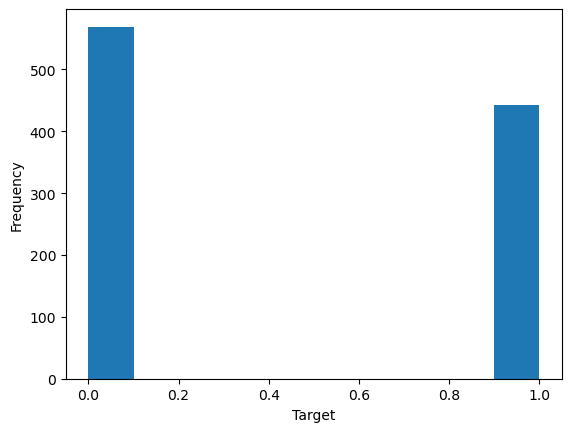

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot a histogram of the target variable
plt.hist(data['target'])
plt.xlabel('Target')
plt.ylabel('Frequency')
plt.show()

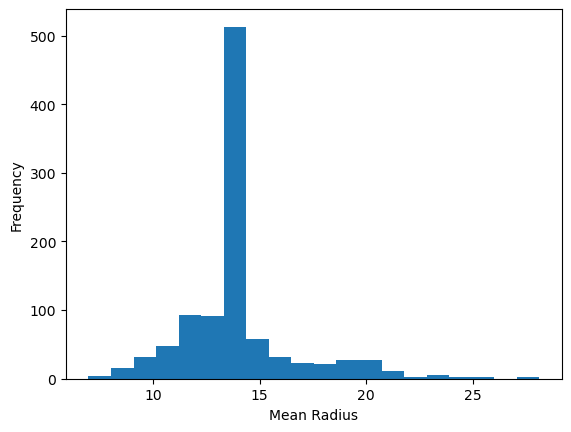

In [11]:
import matplotlib.pyplot as plt

# Create a histogram of the mean radius feature
plt.hist(data['mean radius'], bins=20)
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

> ## MACHINE LEARNING MODELS

# LOGISTIC REGRESSON


In [12]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
# converting to percentage 2 decimal places
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## NAIVE BAYES

In [13]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2)

# Create a Gaussian Naive Bayes model
model = GaussianNB()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2)

# Create a kNN model
model = KNeighborsClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.51%


## DECISION TREE

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2)

# Create a Decision Tree model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 100.00%


## ARTIFICIAL NEURAL NETWORK (MULTI LAYER PERCEPTRON)

In [16]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2)

# Create an MLP model
model = MLPClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 99.01%


## KMEANS CLUSTERING

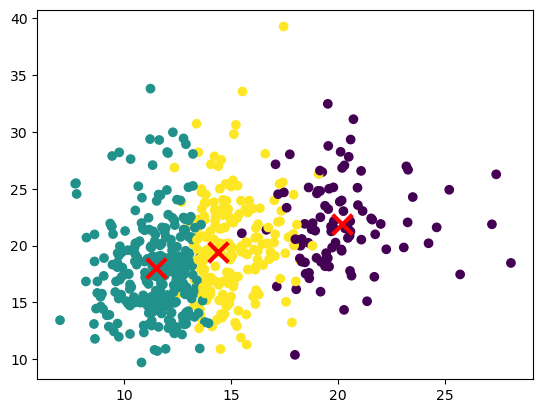

In [17]:
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

# assuming your data is stored in a variable called 'data'
kmeans = KMeans(n_clusters=3) # specify the number of clusters
kmeans.fit(data)

# get the cluster assignments for each data point
labels = kmeans.labels_

# get the coordinates of the cluster centers
cluster_centers = kmeans.cluster_centers_

# plot the data points and color them according to their cluster assignments
# replace 'column_1' and 'column_2' with the names of the columns you want to plot
plt.scatter(data['mean radius'], data['mean texture'], c=labels)

# plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3,
            color='r', zorder=10)

plt.show()


## KMEDOID CLUSTERING

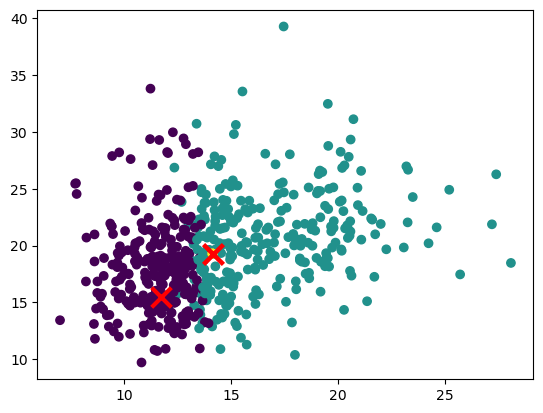

In [18]:
from sklearn_extra.cluster import KMedoids

kmedoids = KMedoids(n_clusters=3)
kmedoids.fit(data)

labels = kmedoids.labels_
cluster_centers = kmedoids.cluster_centers_

# plot the data points and color them according to their cluster assignments
# replace 'mean radius' and 'mean texture' with the names of the columns you want to plot
plt.scatter(data['mean radius'], data['mean texture'], c=labels)

# plot the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='x', s=200, linewidths=3,
            color='r', zorder=10)

plt.show()


## DBSCAN

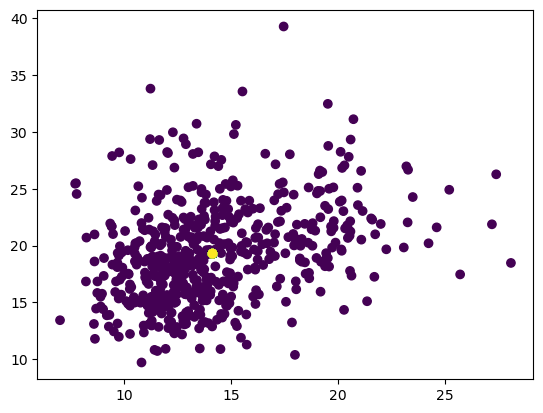

In [19]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(data)

labels = dbscan.labels_

# plot the data points and color them according to their cluster assignments
# replace 'mean radius' and 'mean texture' with the names of the columns you want to plot
plt.scatter(data['mean radius'], data['mean texture'], c=labels)

plt.show()


## AGGLOMERATIVE CLUSTERING

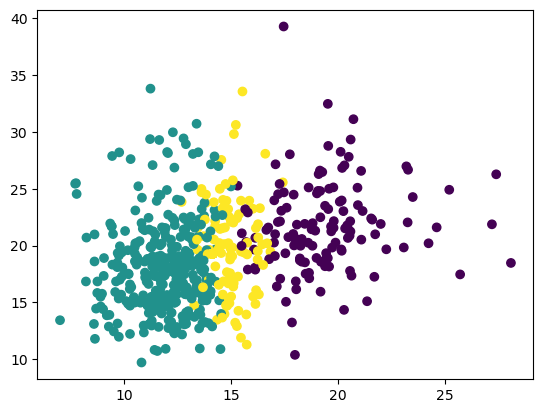

In [20]:
from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=3)
agg_clustering.fit(data)

labels = agg_clustering.labels_

# plot the data points and color them according to their cluster assignments
# replace 'mean radius' and 'mean texture' with the names of the columns you want to plot
plt.scatter(data['mean radius'], data['mean texture'], c=labels)

plt.show()


## HIERARCHICAL CLUSTERING

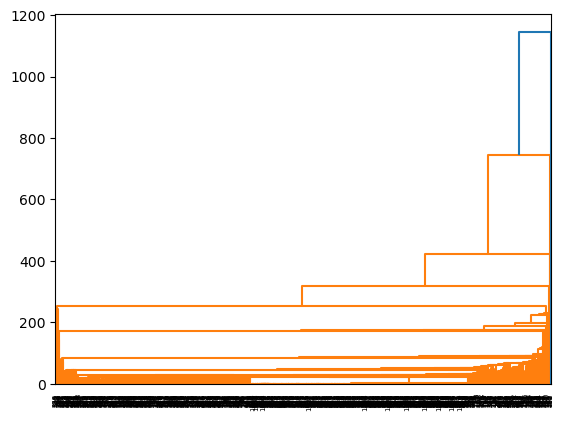

In [21]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(data, 'single')

dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.show()


## XGboost CLASSIFIER

In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2)

# Create an XGBoost model
model = XGBClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')



Accuracy: 100.00%


> ## VISUALIZATIONS

PIE CHARTS

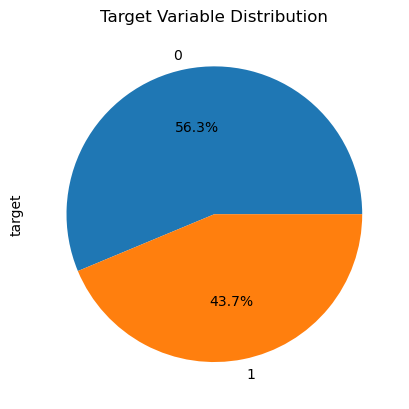

In [23]:
import matplotlib.pyplot as plt

# Create a pie chart of the target variable
data['target'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Target Variable Distribution')
plt.show()

SCATTER PLOT

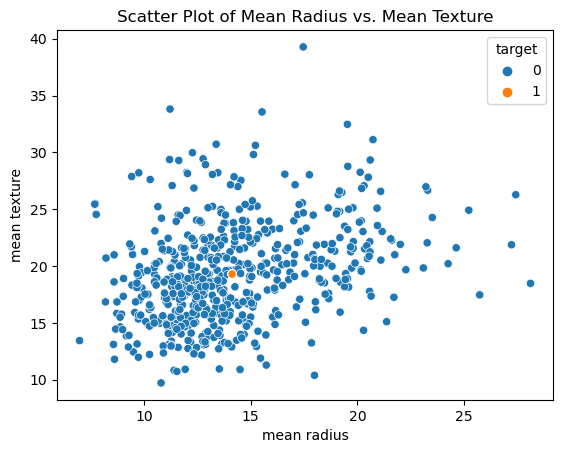

In [24]:
import seaborn as sns

# Create a scatter plot of two features
sns.scatterplot(data=data, x='mean radius', y='mean texture', hue='target')
plt.title('Scatter Plot of Mean Radius vs. Mean Texture')
plt.show()


VIOLON PLOT

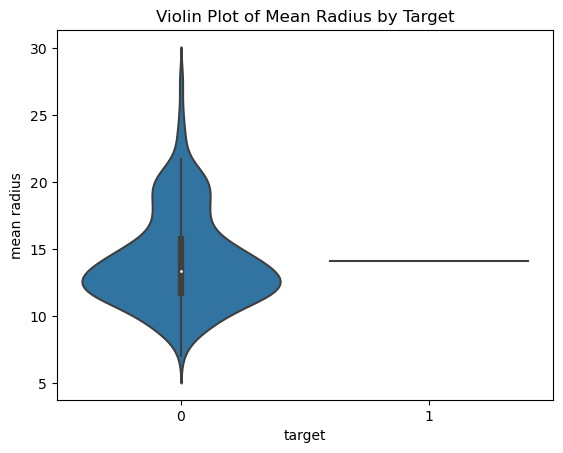

In [25]:
import seaborn as sns

# Create a violin plot of a feature
sns.violinplot(data=data, x='target', y='mean radius')
plt.title('Violin Plot of Mean Radius by Target')
plt.show()


PLOTLYEXPRESS

In [26]:
import plotly.express as px

# Create a violin plot of a feature
fig = px.violin(data, x='target', y='mean radius', box=True, title='Violin Plot of Mean Radius by Target')
fig.show()


> ## EVALUATE THE PERFORMANCE OF MACHINE LEARNING ALGORITHMS

AUC ROC CHARACTERISTIC

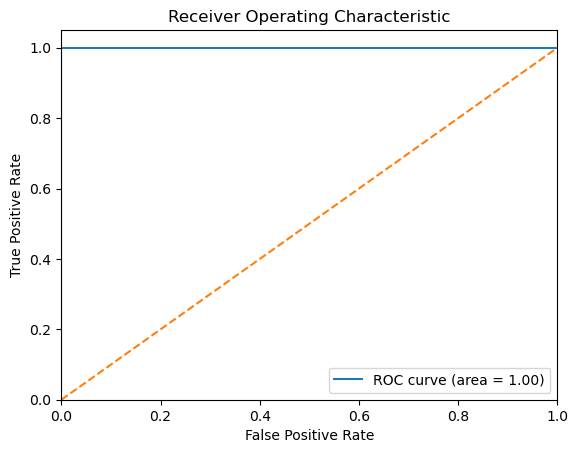

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Compute the predicted probabilities for the test data
y_score = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curvef
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


CLASSIFICATION REPORT

In [28]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.2)

# Create a logistic regression model
model = LogisticRegression()
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print('LogisticRegression:\n',report)
# create a naive bayes model
model = GaussianNB()
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print('Naive Bayes:\n',report)
# create a knn model
model = KNeighborsClassifier()
# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print('KNeighborsClassifier:\n',report)
# create a decision tree model
model = DecisionTreeClassifier()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)
print('DecisionTreeClassifier:\n',report)


LogisticRegression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        86

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203

Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        86

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg       1.00      1.00      1.00       203

KNeighborsClassifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       117
           1       1.00      1.00      1.00        86

    accuracy                           1.00       203
   macro avg       1.00      1.00      1.00       203
weighted avg    

## R SQUARED (COEFFICIENT OF DETERMINATION)

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

target = data['target']
lin_reg = LinearRegression()
lin_reg.fit(data, target)

# make predictions using the fitted model
predictions = lin_reg.predict(data)

# compute the R-squared value
r_squared = r2_score(target, predictions)

print(f'R-squared value: {r_squared:.4f}')


R-squared value: 1.0000


## K-FOLD CROSS VALIDATION

In [30]:
from sklearn.model_selection import cross_val_score

# assuming your data is stored in a variable called 'data'
# and your target variable is stored in a variable called 'target'
lin_reg = LinearRegression()

# perform 5-fold cross-validation
scores = cross_val_score(lin_reg, data, target, cv=5)

# compute the average performance across all 5 folds
mean_score = scores.mean()
print(f'Cross-validated scores: {scores}')


Cross-validated scores: [0. 0. 1. 0. 0.]
